<a href="https://www.kaggle.com/code/vijays140291/earthquakes-prediction404?scriptVersionId=154964688" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/earthquake-database/database.csv')
#showing the dataset
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [3]:
#getting the preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
#checking for missing value in the dataset
df.isna().sum()/len(df)*100

Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64

In [5]:
null_columns=df.loc[:,df.isna().sum()>0.66*df.shape[0]].columns

In [6]:
df=df.drop(null_columns,axis=1)

In [7]:
df.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [8]:
df['Root Mean Square']=df['Root Mean Square'].fillna(df['Root Mean Square'].mean())

In [9]:
df['Magnitude Type']=df['Magnitude Type'].fillna(df['Magnitude Type'].mode()[0])

In [10]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [11]:
#Feature Engineering

df['Month']=df['Date'].apply(lambda x:x[0:2]).astype(int)


In [12]:
df['Day']=df['Date'].apply(lambda x:x[3:5])

In [13]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,02
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,04
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,05
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,08
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,12,28
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,12,28
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,12,28
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,12,29


In [14]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 19, 20])

In [15]:
df['Day']=df['Day'].replace({'5-':'5','1-':'1'})

In [16]:
df['Day']=df['Day'].astype(int)

In [17]:
df['Year']=df['Date'].apply(lambda x:x[-4:])

In [18]:
result = df[df['Year'].str.contains('000Z')]

In [19]:
result2 = df[df['Year'].str.contains('520Z')]

In [20]:
df=df.drop(result.index,axis=0)

In [21]:
df=df.drop(result2.index,axis=0)

In [22]:
df=df.drop('Date',axis=1)

In [23]:
df['Hour']=df['Time'].str.split(':').apply(lambda x:x[0])
df['Minute']=df['Time'].str.split(':').apply(lambda x:x[1])
df['Second']=df['Time'].str.split(':').apply(lambda x:x[2])

In [24]:
df=df.drop('Time',axis=1)

In [25]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Hour,Minute,Second
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,13,44,18
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,11,29,49
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,18,05,58
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,18,49,43
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,13,32,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,12,28,2016,08,22,12
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,12,28,2016,09,13,47
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,12,28,2016,12,38,51
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,12,29,2016,22,30,19


In [26]:
#Visualizing the dataset
numerical_columns=[column for column in df.columns if df.dtypes[column]!='object']

In [27]:
corr=df[numerical_columns].corr()

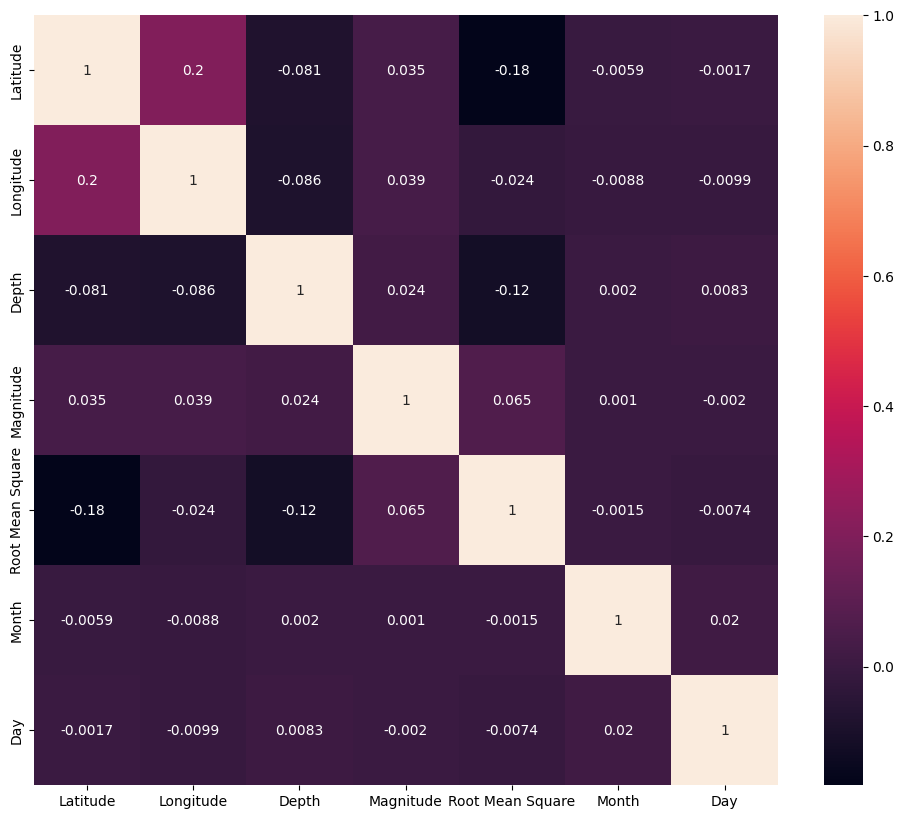

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

In [29]:
df['Status']=df['Status'].apply(lambda x:1 if x=='Reviewed' else 0)

In [30]:
df['Status']

0        0
1        0
2        0
3        0
4        0
        ..
23407    1
23408    1
23409    1
23410    1
23411    1
Name: Status, Length: 23410, dtype: int64

In [31]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Hour,Minute,Second
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,0,1,2,1965,13,44,18
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,0,1,4,1965,11,29,49
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,0,1,5,1965,18,05,58
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,0,1,8,1965,18,49,43
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,0,1,9,1965,13,32,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,1,12,28,2016,08,22,12
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,1,12,28,2016,09,13,47
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,1,12,28,2016,12,38,51
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,1,12,29,2016,22,30,19


In [32]:
df=df.drop(['ID'],axis=1)

In [33]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Hour,Minute,Second
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,2,1965,13,44,18
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,4,1965,11,29,49
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,5,1965,18,05,58
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,8,1965,18,49,43
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,9,1965,13,32,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,1,12,28,2016,08,22,12
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,1,12,28,2016,09,13,47
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,1,12,28,2016,12,38,51
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,1,12,29,2016,22,30,19


In [34]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [35]:
df=onehot_encode(df,['Type',"Magnitude Type",'Source','Location Source','Magnitude Source'])

In [36]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Day,Year,Hour,Minute,Second,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MB,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_AK,Source_ATLAS,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Location Source_AEI,Location Source_AEIC,Location Source_AG,Location Source_AGS,Location Source_AK,Location Source_ATH,Location Source_ATLAS,Location Source_B,Location Source_BEO,Location Source_BOU,Location Source_BRK,Location Source_CAR,Location Source_CASC,Location Source_CI,Location Source_CSEM,Location Source_G,Location Source_GCMT,Location Source_GUC,Location Source_H,Location Source_HVO,Location Source_ISCGEM,Location Source_ISK,Location Source_JMA,Location Source_LIM,Location Source_MDD,Location Source_NC,Location Source_NN,Location Source_OTT,Location Source_PGC,Location Source_PR,Location Source_ROM,Location Source_RSPR,Location Source_SE,Location Source_SJA,Location Source_SLC,Location Source_SPE,Location Source_TAP,Location Source_TEH,Location Source_THE,Location Source_THR,Location Source_TUL,Location Source_U,Location Source_UCR,Location Source_UNM,Location Source_US,Location Source_US_WEL,Location Source_UW,Location Source_WEL,Magnitude Source_1000,Magnitude Source_1009,Magnitude Source_1020,Magnitude Source_1023,Magnitude Source_AK,Magnitude Source_ATLAS,Magnitude Source_BRK,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_GUC,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_NIED,Magnitude Source_NN,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,2,1965,13,44,18,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,4,1965,11,29,49,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,5,1965,18,05,58,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,8,1965,18,49,43,True,False,False,False,

In [37]:
df.isna().sum()

Latitude                    0
Longitude                   0
Depth                       0
Magnitude                   0
Root Mean Square            0
                           ..
Magnitude Source_SE         0
Magnitude Source_US         0
Magnitude Source_US_GCMT    0
Magnitude Source_US_PGC     0
Magnitude Source_UW         0
Length: 111, dtype: int64

In [38]:
for column in [column for column in df.columns if df.dtypes[column]=='bool']:
    df[column]=df[column].astype(float)

In [39]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Day,Year,Hour,Minute,Second,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MB,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_AK,Source_ATLAS,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Location Source_AEI,Location Source_AEIC,Location Source_AG,Location Source_AGS,Location Source_AK,Location Source_ATH,Location Source_ATLAS,Location Source_B,Location Source_BEO,Location Source_BOU,Location Source_BRK,Location Source_CAR,Location Source_CASC,Location Source_CI,Location Source_CSEM,Location Source_G,Location Source_GCMT,Location Source_GUC,Location Source_H,Location Source_HVO,Location Source_ISCGEM,Location Source_ISK,Location Source_JMA,Location Source_LIM,Location Source_MDD,Location Source_NC,Location Source_NN,Location Source_OTT,Location Source_PGC,Location Source_PR,Location Source_ROM,Location Source_RSPR,Location Source_SE,Location Source_SJA,Location Source_SLC,Location Source_SPE,Location Source_TAP,Location Source_TEH,Location Source_THE,Location Source_THR,Location Source_TUL,Location Source_U,Location Source_UCR,Location Source_UNM,Location Source_US,Location Source_US_WEL,Location Source_UW,Location Source_WEL,Magnitude Source_1000,Magnitude Source_1009,Magnitude Source_1020,Magnitude Source_1023,Magnitude Source_AK,Magnitude Source_ATLAS,Magnitude Source_BRK,Magnitude Source_CI,Magnitude Source_GCMT,Magnitude Source_GUC,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_NIED,Magnitude Source_NN,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,2,1965,13,44,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,4,1965,11,29,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,5,1965,18,05,58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,8,1965,18,49,43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,9,1965,13,32,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [40]:
df=df.drop(df[df['Year'].str.contains('530Z')].index,axis=0)

In [41]:
y=df['Status']
x=df.drop('Status',axis=1)
scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)



In [42]:
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)